# EDA

In [44]:
import pandas as pd
import numpy as np
import wfdb
import ast
from tqdm import tqdm
import warnings; warnings.filterwarnings('ignore')
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Raw Data

In [45]:
def load_raw_data(df, sampling_rate, path, max_data=None):
    # Choose the correct filename column based on sampling_rate
    filenames = df.filename_lr if sampling_rate == 100 else df.filename_hr
    
    # If max_data is specified, limit the filenames list to max_data elements
    if max_data is not None:
        filenames = filenames[:max_data]
    
    # Use list comprehension to read and store data efficiently
    data = [wfdb.rdsamp(path+f) for f in tqdm(filenames)]
    
    # Extract signal data and convert to numpy array
    data = np.array([signal for signal, meta in data])
    
    return data


In [46]:
path = 'ptb-xl-dataset/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/'
sampling_rate=100

# load and convert annotation data
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

#Y = Y.head(100)

# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)

print('data shpae:', X.shape)
Y[['scp_codes']]

100%|██████████| 21837/21837 [00:35<00:00, 615.18it/s]


data shpae: (21837, 1000, 12)


,scp_codes
ecg_id,
1,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}"
2,"{'NORM': 80.0, 'SBRAD': 0.0}"
3,"{'NORM': 100.0, 'SR': 0.0}"
4,"{'NORM': 100.0, 'SR': 0.0}"
5,"{'NORM': 100.0, 'SR': 0.0}"
...,...
21833,"{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST..."
21834,"{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}"
21835,"{'ISCAS': 50.0, 'SR': 0.0}"


In [47]:
Y

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703.0,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


## Load Data for Heart Beat Diagnostic 

In [48]:
# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]
print(agg_df.shape)
agg_df.head()

(44, 12)


,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7


In [49]:
def aggregate_supclass_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))
    
# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_supclass_diagnostic)
Y['diagnostic_superclass_len'] = Y['diagnostic_superclass'].apply(len)
Y.loc[Y.diagnostic_superclass_len > 1, 'diagnostic_superclass']

ecg_id
39       [MI, STTC]
45        [HYP, CD]
50         [MI, CD]
77         [MI, CD]
87       [STTC, CD]
            ...    
21815      [MI, CD]
21821    [NORM, CD]
21827    [MI, STTC]
21828    [MI, STTC]
21829    [NORM, CD]
Name: diagnostic_superclass, Length: 5158, dtype: object

In [50]:
Y["diagnostic_superclass"]

ecg_id
1        [NORM]
2        [NORM]
3        [NORM]
4        [NORM]
5        [NORM]
          ...  
21833    [STTC]
21834    [NORM]
21835    [STTC]
21836    [NORM]
21837    [NORM]
Name: diagnostic_superclass, Length: 21837, dtype: object

### Number of Superclass per ECG record

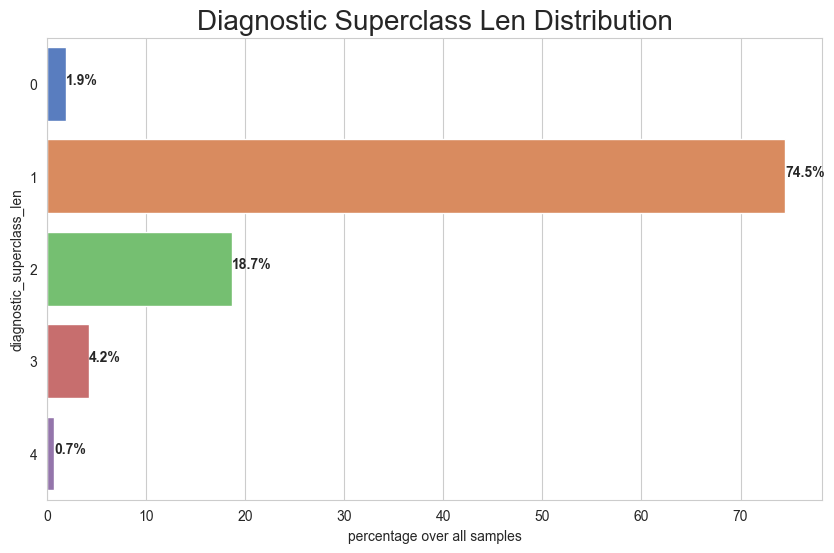

In [77]:
vc = Y['diagnostic_superclass_len'].value_counts()

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/vc.values.sum()*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnostic Superclass Len Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnostic_superclass_len")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

> There could be up to 4 super class for the same ecg record!

#### Meaning of Superclassses
* NORM: Normal ECG
* MI:   Myocardial Infarction, a myocardial infarction (MI), commonly known as a heart attack, occurs when blood flow decreases or stops to a part of the heart, causing damage to the heart muscle [Reference](https://en.wikipedia.org/wiki/Myocardial_infarction)
* STTC: ST/T Change, ST and T wave changes may represent cardiac pathology or be a normal variant. Interpretation of the findings, therefore, depends on the clinical context and presence of similar findings on prior electrocardiograms.[Reference](https://www.uptodate.com/contents/ecg-tutorial-st-and-t-wave-changes)
* CD:   Conduction Disturbance. Your heart rhythm is the way your heart beats. Conduction is how electrical impulses travel through your heart, which causes it to beat. Some conduction disorders can cause arrhythmias, or irregular heartbeats. [Reference](https://www.heart.org/en/health-topics/arrhythmia/about-arrhythmia/conduction-disorders)
* HYP:  Hypertrophy, Hypertrophic cardiomyopathy (HCM) is a disease in which the heart muscle becomes abnormally thick (hypertrophied). The thickened heart muscle can make it harder for the heart to pump blood. [Reference](https://www.mayoclinic.org/diseases-conditions/hypertrophic-cardiomyopathy/symptoms-causes/syc-20350198)

### Number of Subclass per ECG record

In [79]:
def aggregate_subclass_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_subclass)
    ret = list(set(tmp))
    ret = ['sub_'+r for r in ret] # to distinguish between subclass and superclass columns
    return ret

# Apply diagnostic subclass
Y['diagnostic_subclass'] = Y.scp_codes.apply(aggregate_subclass_diagnostic)
Y['diagnostic_subclass_len'] = Y['diagnostic_subclass'].apply(len)
Y.loc[Y.diagnostic_subclass_len > 1, 'diagnostic_subclass']

ecg_id
26                    [sub_STTC, sub_NST_]
28                    [sub_STTC, sub_NST_]
39           [sub_STTC, sub_NST_, sub_IMI]
45       [sub_RAO/RAE, sub_IRBBB, sub_RVH]
50                     [sub_LMI, sub_IVCD]
                       ...                
21821                [sub_NORM, sub_IRBBB]
21827                  [sub_ISCA, sub_IMI]
21828                  [sub_ISCA, sub_IMI]
21829                [sub_NORM, sub_IRBBB]
21832            [sub_IVCD, sub_LAFB/LPFB]
Name: diagnostic_subclass, Length: 6191, dtype: object

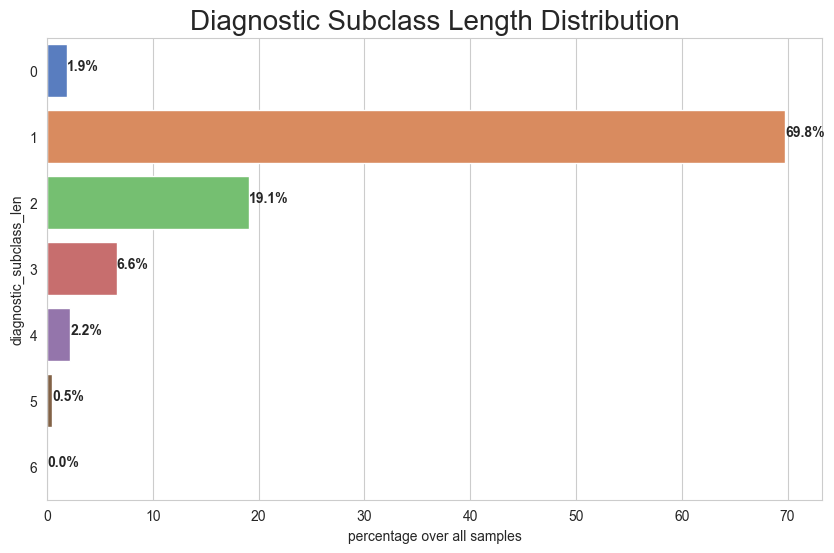

In [53]:
vc = Y['diagnostic_subclass_len'].value_counts()

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/vc.values.sum()*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnostic Subclass Length Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnostic_subclass_len")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

> There could be up to 6 sub class for the same ecg record!

In [54]:
Y.columns.tolist()

['patient_id',
 'age',
 'sex',
 'height',
 'weight',
 'nurse',
 'site',
 'device',
 'recording_date',
 'report',
 'scp_codes',
 'heart_axis',
 'infarction_stadium1',
 'infarction_stadium2',
 'validated_by',
 'second_opinion',
 'initial_autogenerated_report',
 'validated_by_human',
 'baseline_drift',
 'static_noise',
 'burst_noise',
 'electrodes_problems',
 'extra_beats',
 'pacemaker',
 'strat_fold',
 'filename_lr',
 'filename_hr',
 'diagnostic_superclass',
 'diagnostic_superclass_len',
 'diagnostic_subclass',
 'diagnostic_subclass_len']

## Reformat Data for EDA

In [55]:
all_superclass = pd.Series(np.concatenate(Y['diagnostic_superclass'].values))
all_subclass = pd.Series(np.concatenate(Y['diagnostic_subclass'].values))
superclass_cols = all_superclass.unique()
subclass_cols = all_subclass.unique()
update_cols = np.concatenate([superclass_cols, subclass_cols]) # add meta data columns
meta_cols = ['age', 'sex', 'height', 'weight', 'nurse', 'site', 'device',] # could add more columns as features

In [56]:
class ClassUpdate():
    def __init__(self, cols):
        self.cols = cols

    def __call__(self, row):
        for sc in row['diagnostic_superclass']:
            row[sc] = 1
        for sc in row['diagnostic_subclass']:
            row[sc] = 1
            
        return row

def get_data_by_folds(folds, x, y, update_cols, feature_cols):
    assert len(folds)  > 0, '# of provided folds should longer than 1'
    #print(y.strat_fold)
    filt = np.isin(y.strat_fold.values, folds)
    x_selected = x[filt]
    y_selected = y[filt]
    
    for sc in update_cols:
        y_selected[sc] = 0
        
    cls_updt = ClassUpdate(update_cols)
    
    y_selected = y_selected.apply(cls_updt, axis=1)
    
    return x_selected, y_selected[list(feature_cols)+list(update_cols)+['strat_fold']]

In [57]:
x_all, y_all = get_data_by_folds(np.arange(1, 11), X, Y, update_cols, meta_cols)

In [58]:
y_all

,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_ISC_,sub_SEHYP,sub_ISCI,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_WPW,sub_PMI,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
2,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,5
4,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
5,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,0,1,...,0,0,0,0,0,0,0,0,0,7
21834,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,4
21835,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,0,1,...,0,0,0,0,0,0,0,0,0,2


### Superclass Distribution

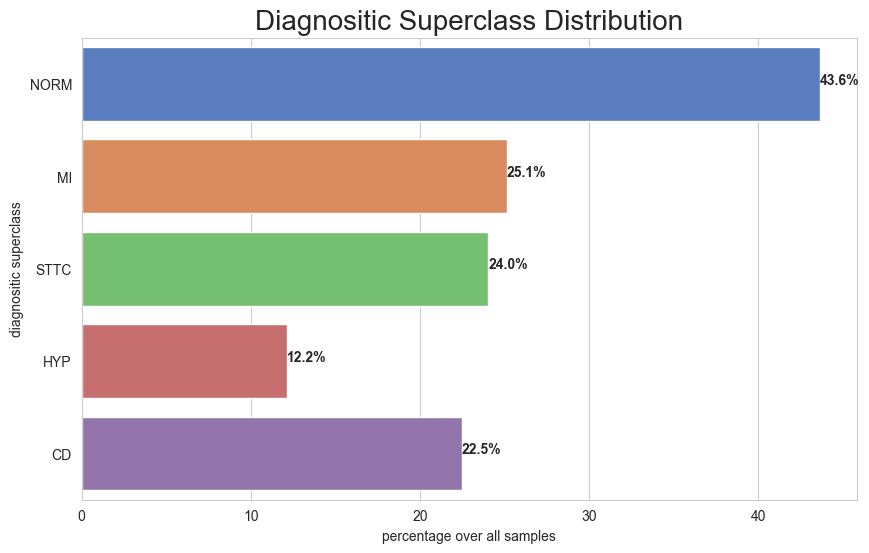

In [59]:
vc = y_all[superclass_cols].sum(axis=0)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/y_all.shape[0]*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnositic Superclass Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnositic superclass")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

### Subclass Distribution

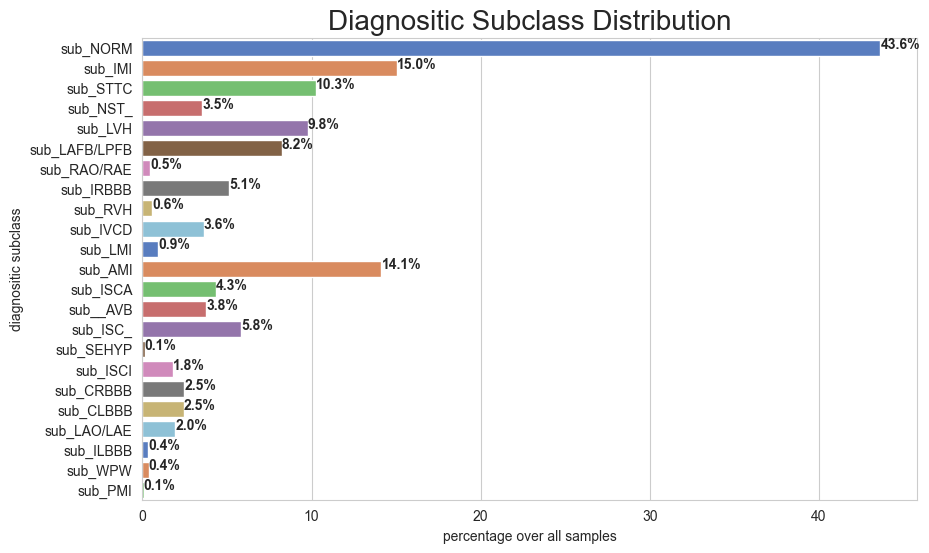

In [60]:
vc = y_all[subclass_cols].sum(axis=0)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/y_all.shape[0]*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnositic Subclass Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnositic subclass")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

### Subclass Distribution of each Superclass

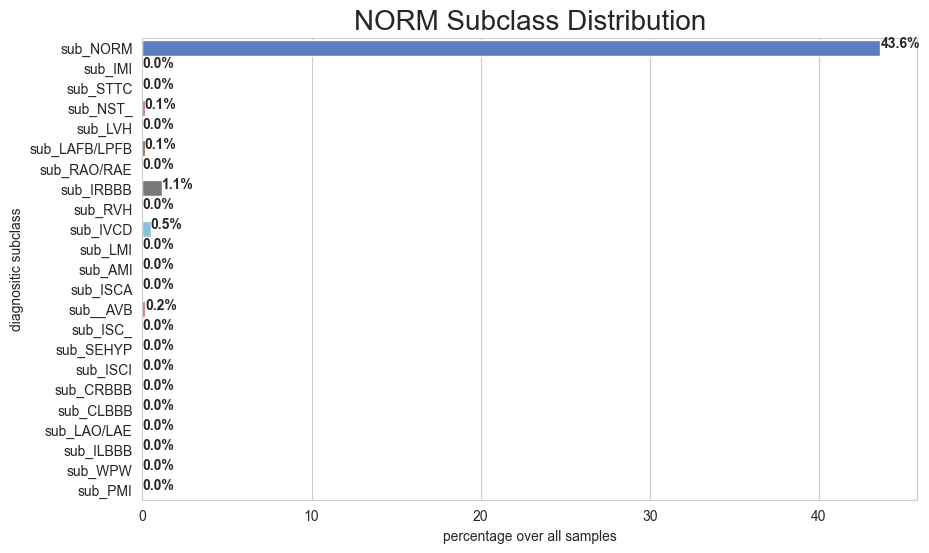

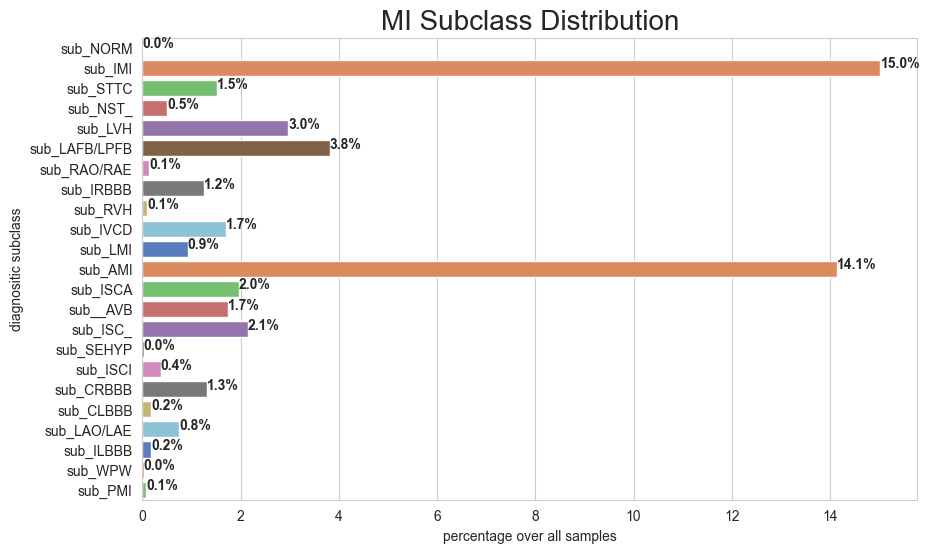

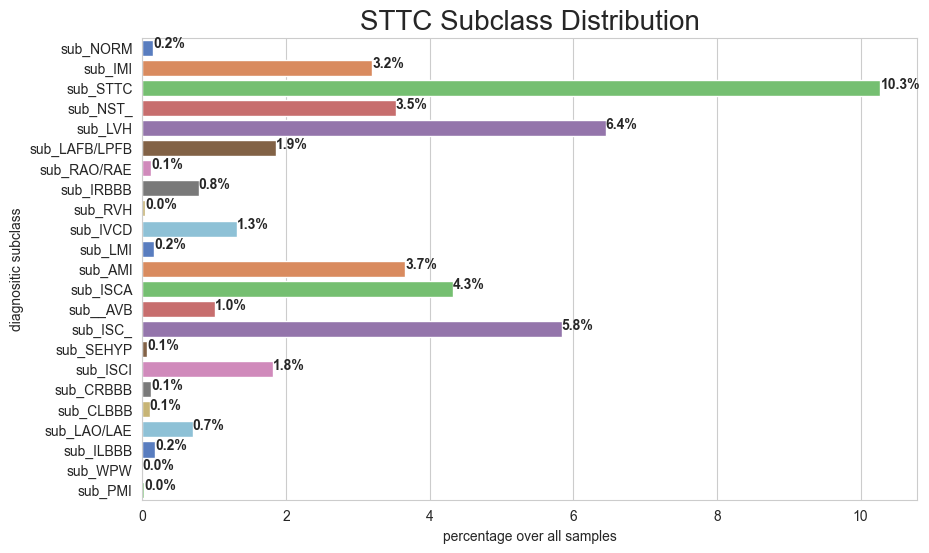

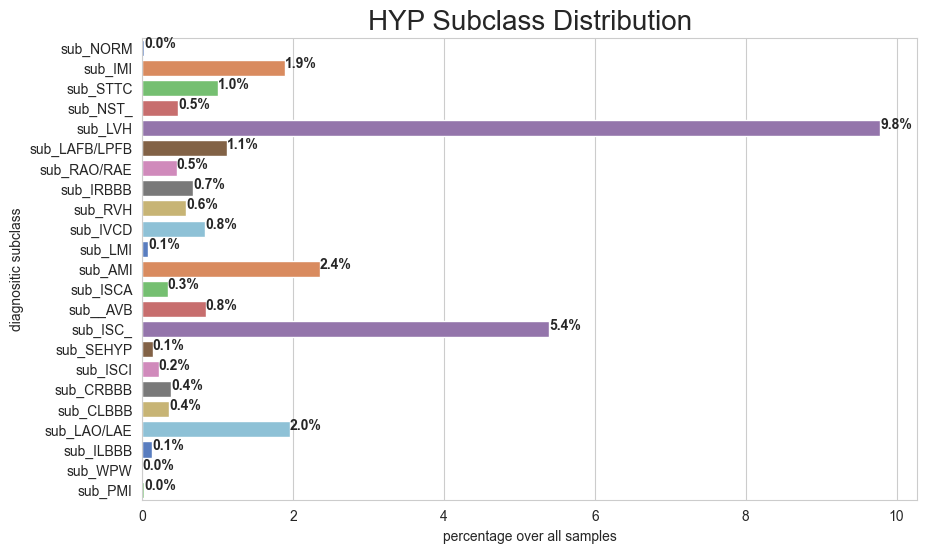

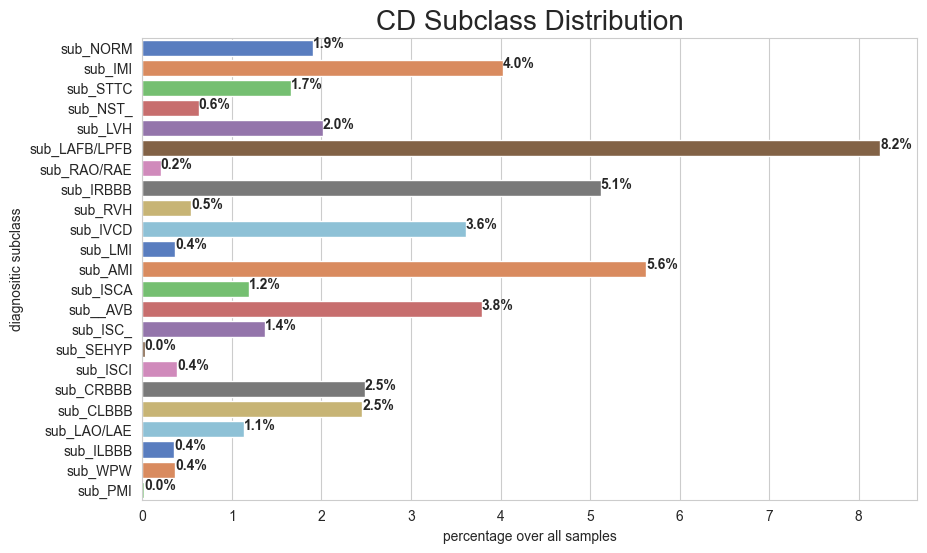

In [61]:
for superclass in superclass_cols:
    
    vc = y_all.loc[y_all[superclass] == 1][subclass_cols].sum(axis=0)
    
    sns.set_style("whitegrid")
    bar,ax = plt.subplots(figsize=(10,6))
    ax = sns.barplot(x=vc.values/y_all.shape[0]*100., y=vc.index, ci=None, palette="muted",orient='h' )
    ax.set_title("{} Subclass Distribution".format(superclass), fontsize=20)
    ax.set_xlabel ("percentage over all samples")
    ax.set_ylabel ("diagnositic subclass")
    for rect in ax.patches:
        ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

In [62]:
meta_cols

['age', 'sex', 'height', 'weight', 'nurse', 'site', 'device']

### Per Superclass Age Distribution

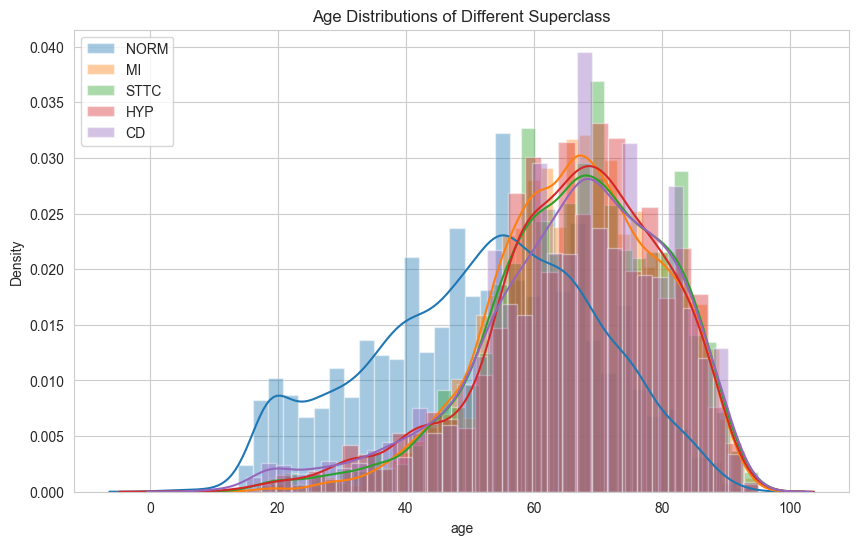

In [63]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Age Distributions of Different Superclass')

for superclass in superclass_cols:
    data = y_all.loc[y_all[superclass] == 1]['age']   
    sns.distplot(data, label=superclass)


plt.legend(loc='upper left')
plt.show()

### Per Superclass Height Distribution

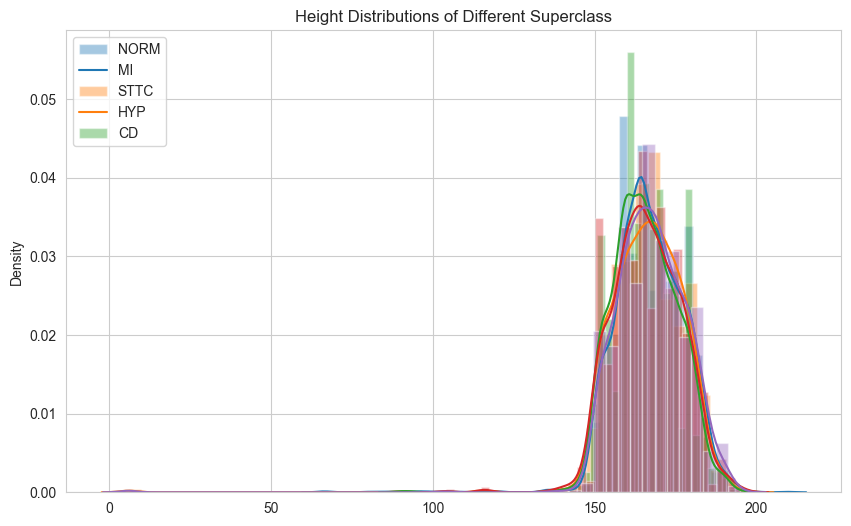

In [64]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Height Distributions of Different Superclass')

for superclass in superclass_cols:
    data = y_all.loc[y_all[superclass] == 1][['height']]
    sns.distplot(data, label=superclass)

plt.legend(labels=superclass_cols, loc='upper left')
plt.show()

### Per Superclass Weight Distribution

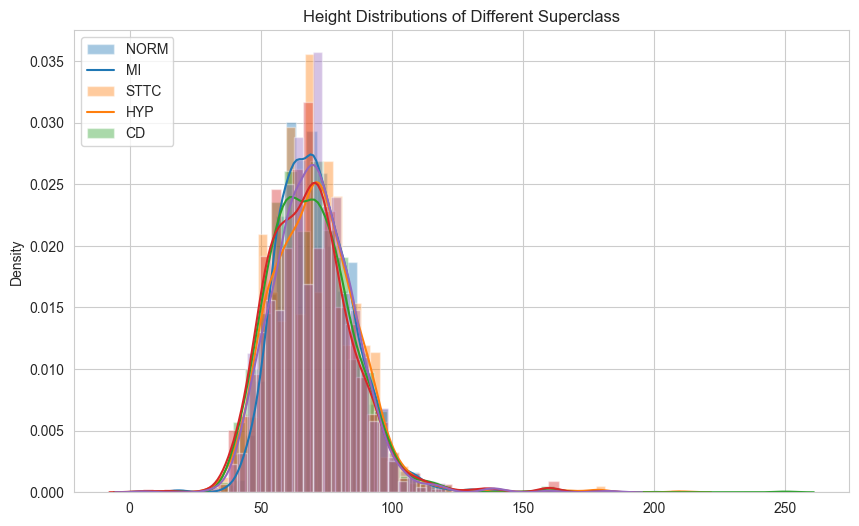

In [65]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Height Distributions of Different Superclass')

for superclass in superclass_cols:
    data = y_all.loc[y_all[superclass] == 1][['weight']]
    sns.distplot(data, label=superclass)

plt.legend(labels=superclass_cols, loc='upper left')
plt.show()

### Per Sex Superclass Distribution

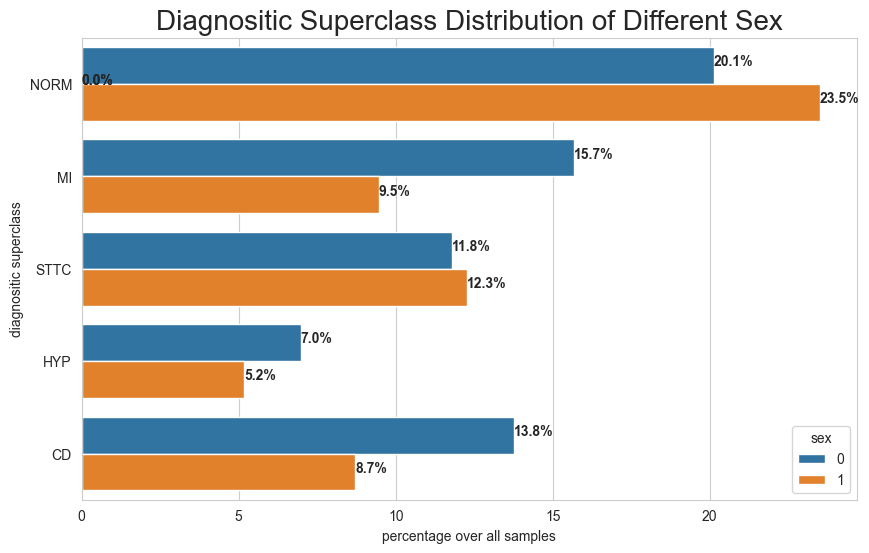

In [66]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
    
ax.set_title("Diagnositic Superclass Distribution of Different Sex", fontsize=20)

all_index, all_count, all_values = [], [], []
for sex in y_all.sex.unique():
    vc = y_all.loc[y_all.sex == sex][superclass_cols].sum(axis=0)
    all_index += list(vc.index)
    all_count += list(vc.values/y_all.shape[0]*100.)
    all_values += [sex]*len(vc)
    #print(all_sex)
    
df = pd.DataFrame()
df['diagnositic superclass'] = all_index
df['percentage over all samples'] = all_count
df['sex'] = all_values
    
ax = sns.barplot(data=df, x="percentage over all samples", y="diagnositic superclass", hue="sex",ci=None, orient='h')
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold')

### Per Nurse Superclass Distribution

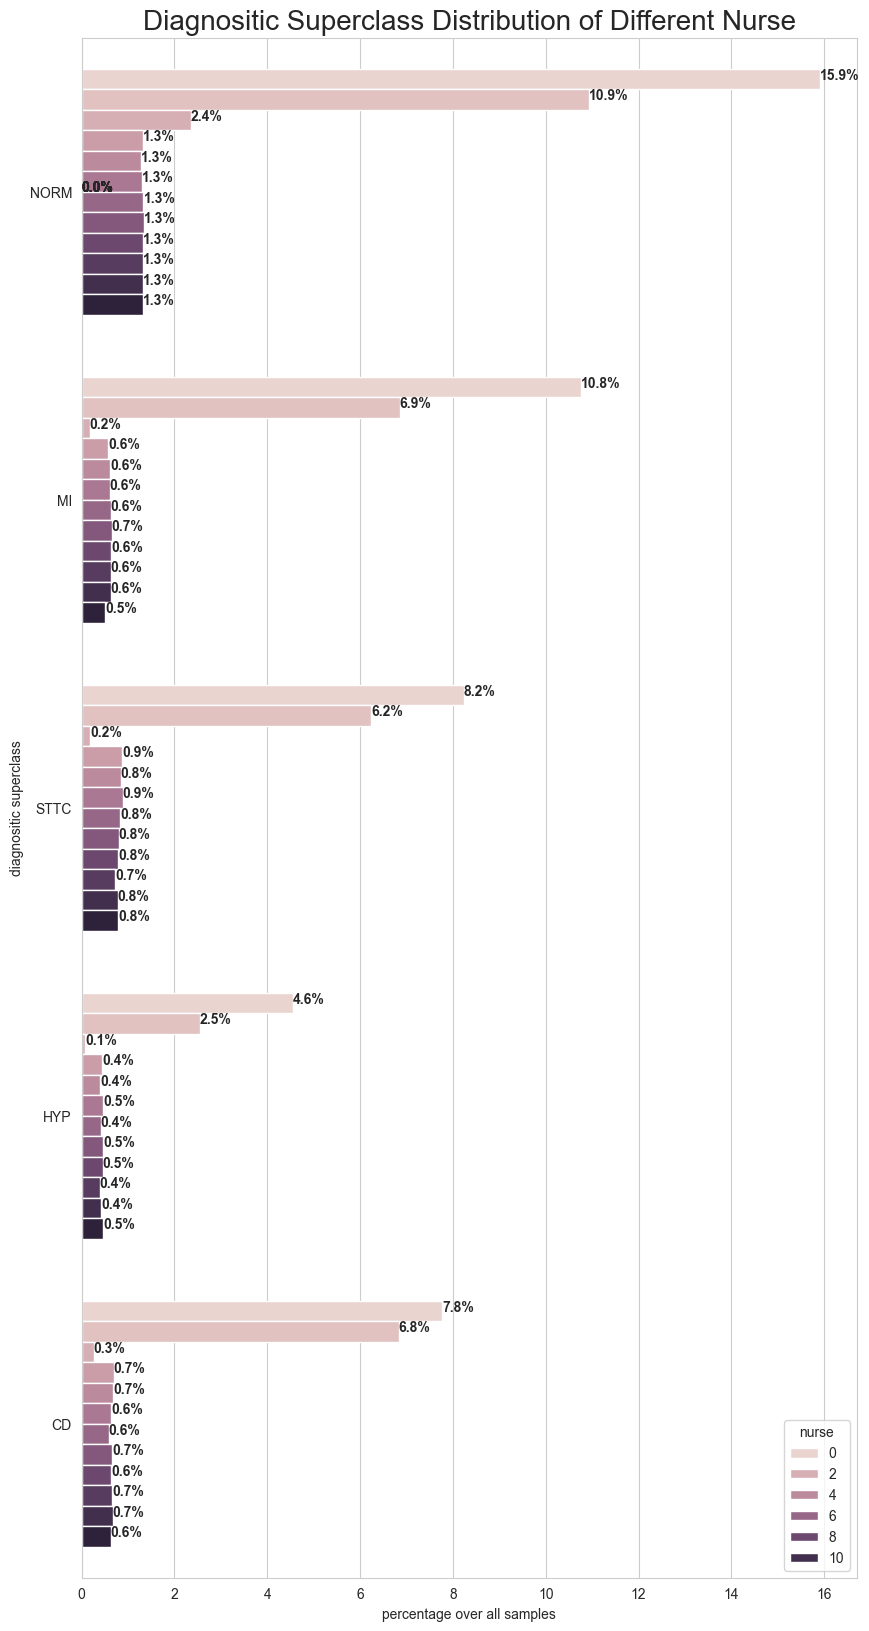

In [67]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,20))
    
ax.set_title("Diagnositic Superclass Distribution of Different Nurse", fontsize=20)

all_index, all_count, all_values = [], [], []
for nurse in y_all.nurse.unique():
    vc = y_all.loc[y_all.nurse == nurse][superclass_cols].sum(axis=0)
    all_index += list(vc.index)
    all_count += list(vc.values/y_all.shape[0]*100.)
    all_values += [nurse]*len(vc)
    #print(all_sex)
    
df = pd.DataFrame()
df['diagnositic superclass'] = all_index
df['percentage over all samples'] = all_count
df['nurse'] = all_values
    
ax = sns.barplot(data=df, x="percentage over all samples", y="diagnositic superclass", hue="nurse",ci=None, orient='h')
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold')

### Per Site Superclass Distribution

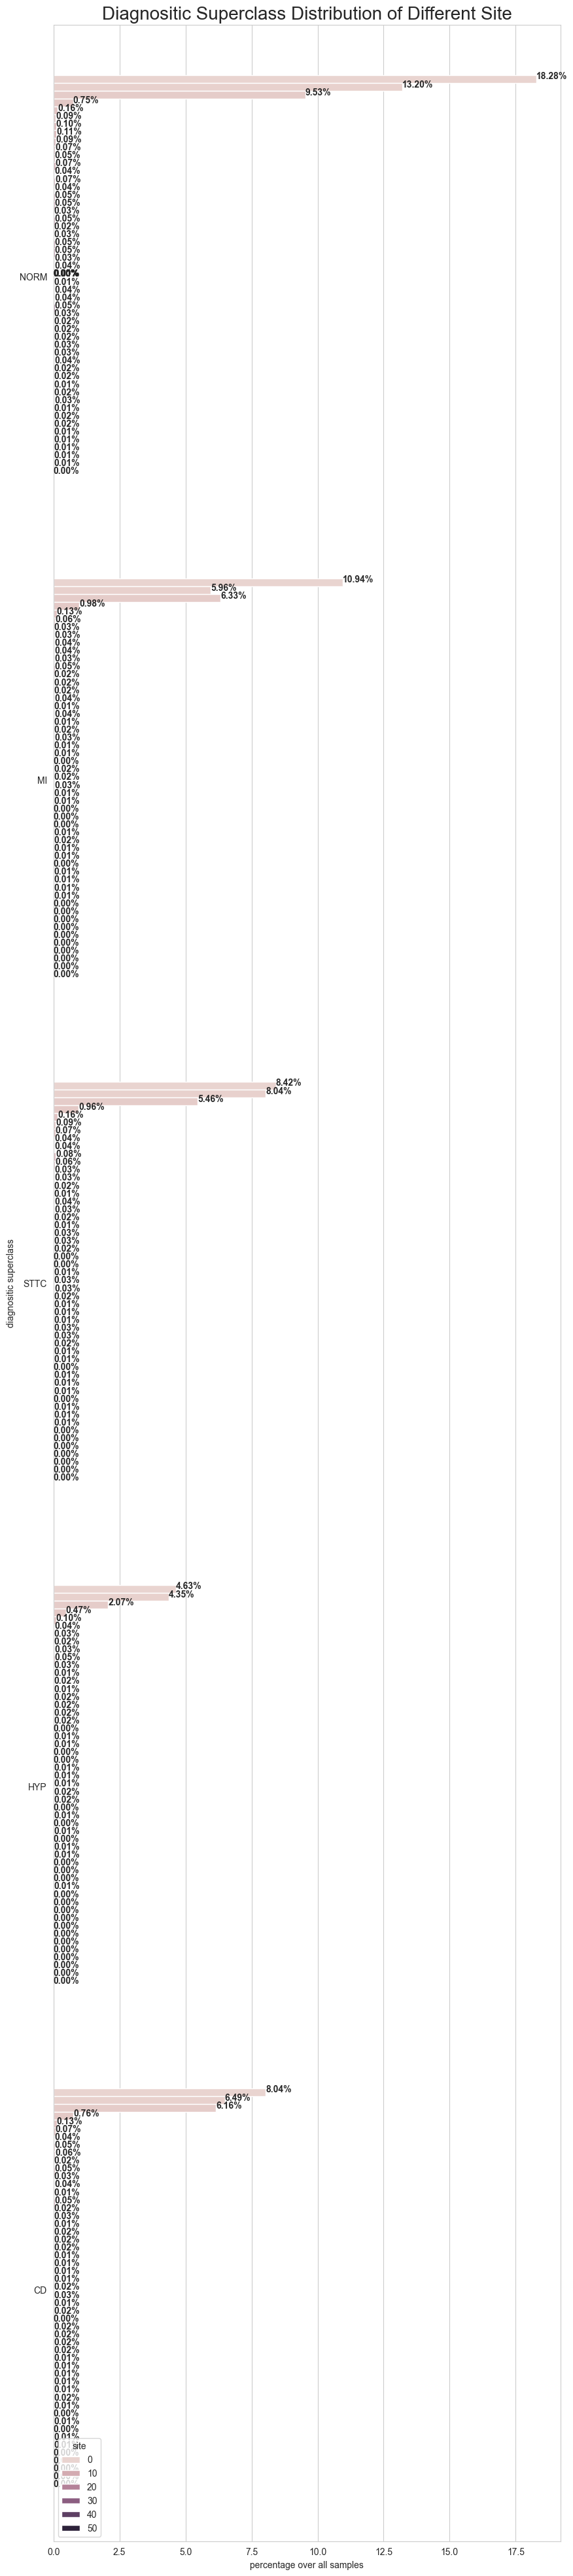

In [68]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,50))
    
ax.set_title("Diagnositic Superclass Distribution of Different Site", fontsize=20)

all_index, all_count, all_values = [], [], []
for site in y_all.site.unique():
    vc = y_all.loc[y_all.site == site][superclass_cols].sum(axis=0)
    all_index += list(vc.index)
    all_count += list(vc.values/y_all.shape[0]*100.)
    all_values += [site]*len(vc)
    #print(all_sex)
    
df = pd.DataFrame()
df['diagnositic superclass'] = all_index
df['percentage over all samples'] = all_count
df['site'] = all_values
    
ax = sns.barplot(data=df, x="percentage over all samples", y="diagnositic superclass", hue="site",ci=None, orient='h')
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.2f%%"% rect.get_width(), weight='bold')

### Per Device Superclass Distribution

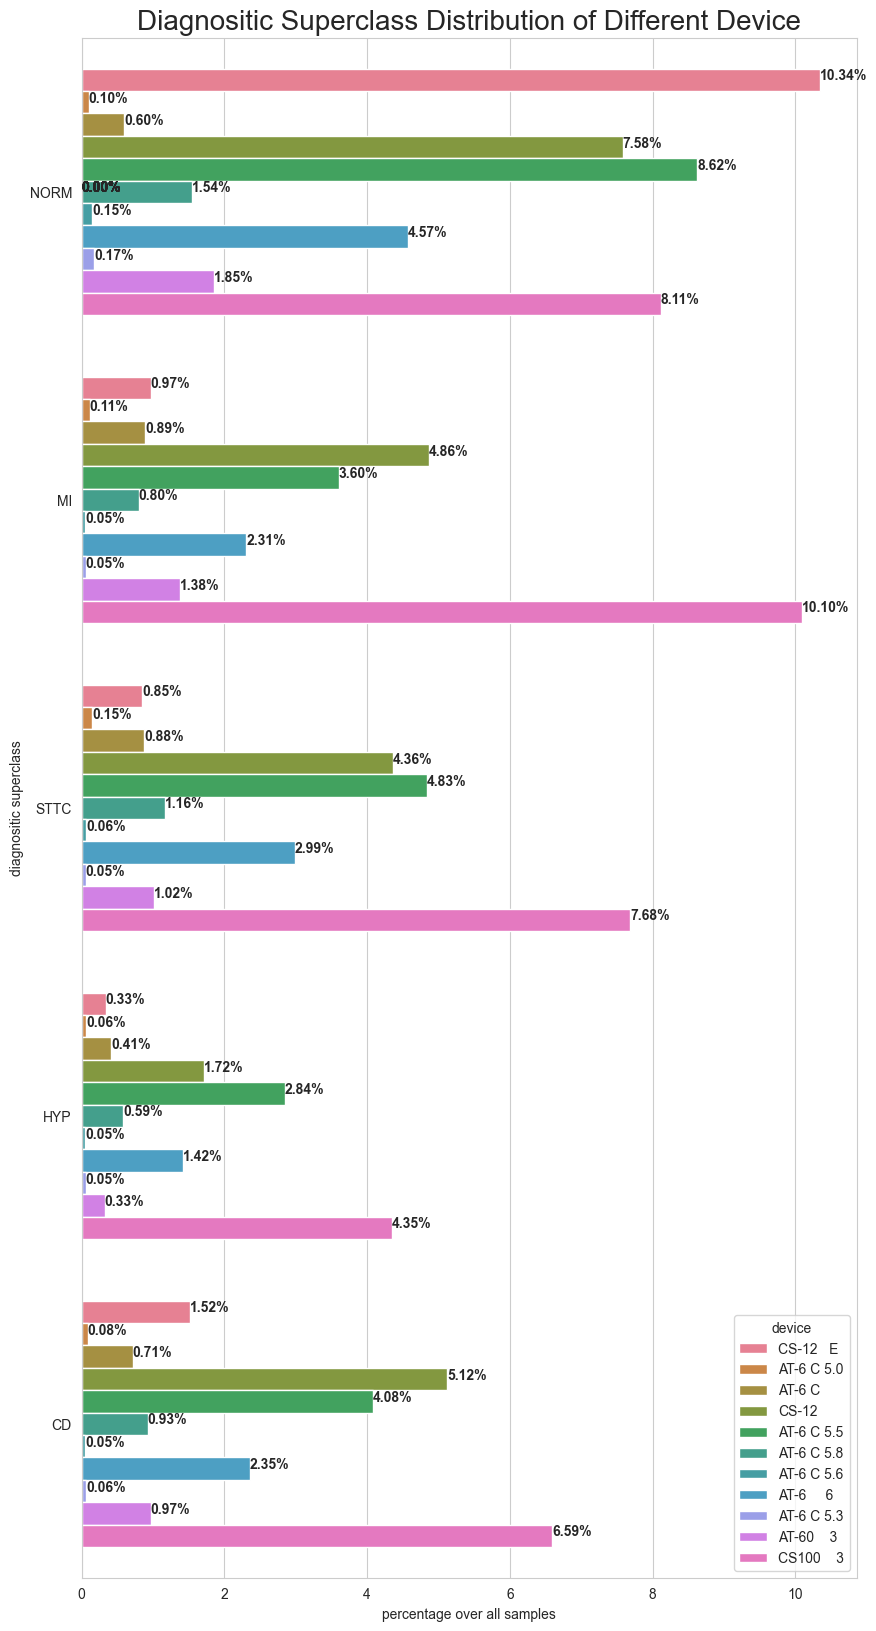

In [69]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,20))
    
ax.set_title("Diagnositic Superclass Distribution of Different Device", fontsize=20)

all_index, all_count, all_values = [], [], []
for device in y_all.device.unique():
    vc = y_all.loc[y_all.device == device][superclass_cols].sum(axis=0)
    all_index += list(vc.index)
    all_count += list(vc.values/y_all.shape[0]*100.)
    all_values += [device]*len(vc)
    #print(all_sex)
    
df = pd.DataFrame()
df['diagnositic superclass'] = all_index
df['percentage over all samples'] = all_count
df['device'] = all_values

ax = sns.barplot(data=df, x="percentage over all samples", y="diagnositic superclass", hue="device",ci=None, orient='h')
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.2f%%"% rect.get_width(), weight='bold')

### Per Superclass ECG Examples

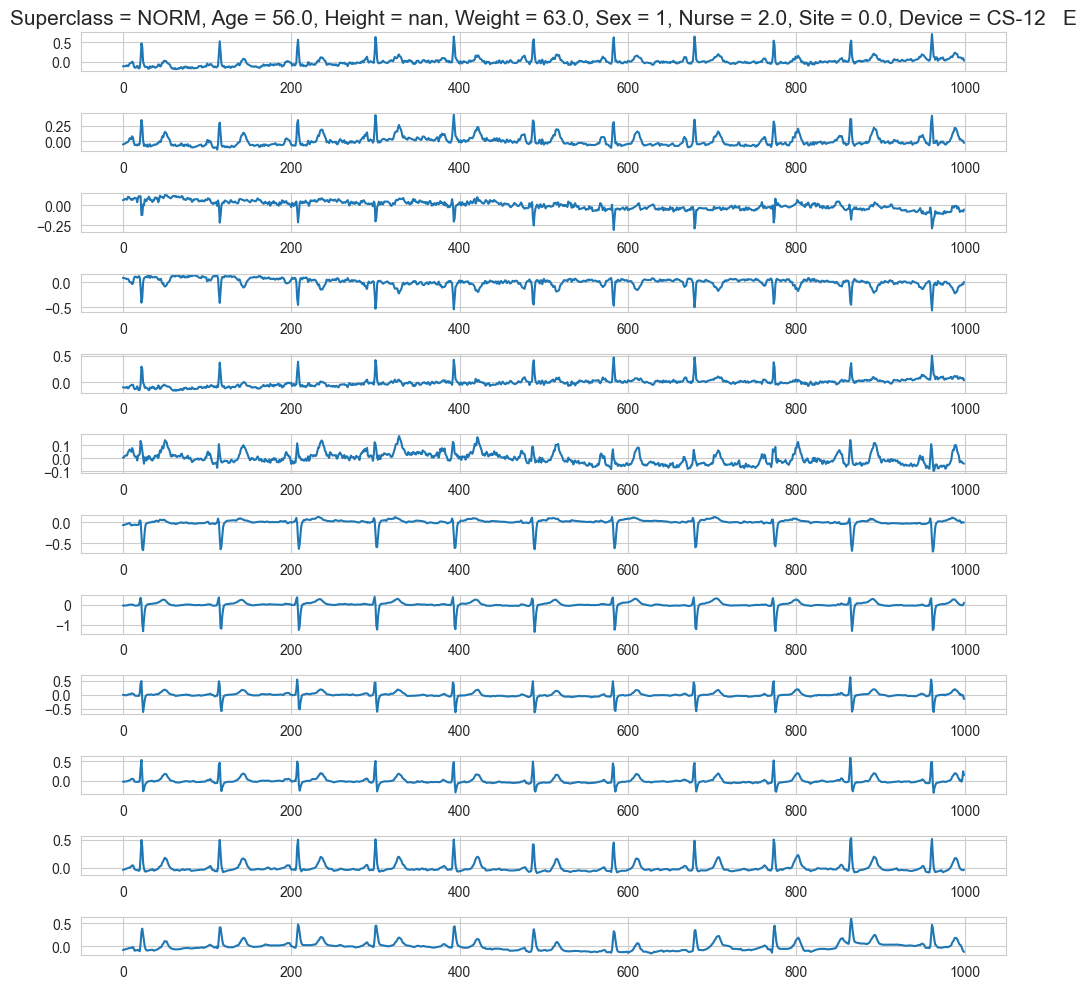

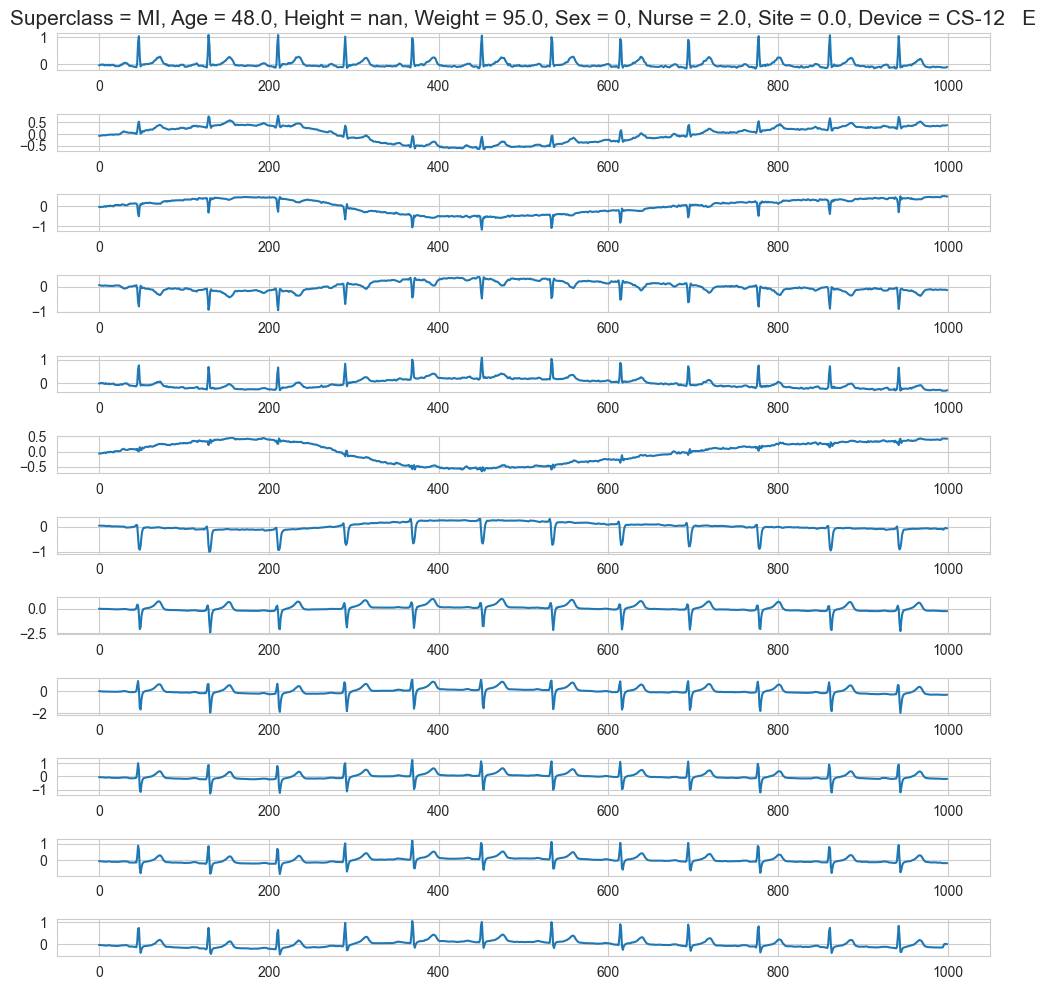

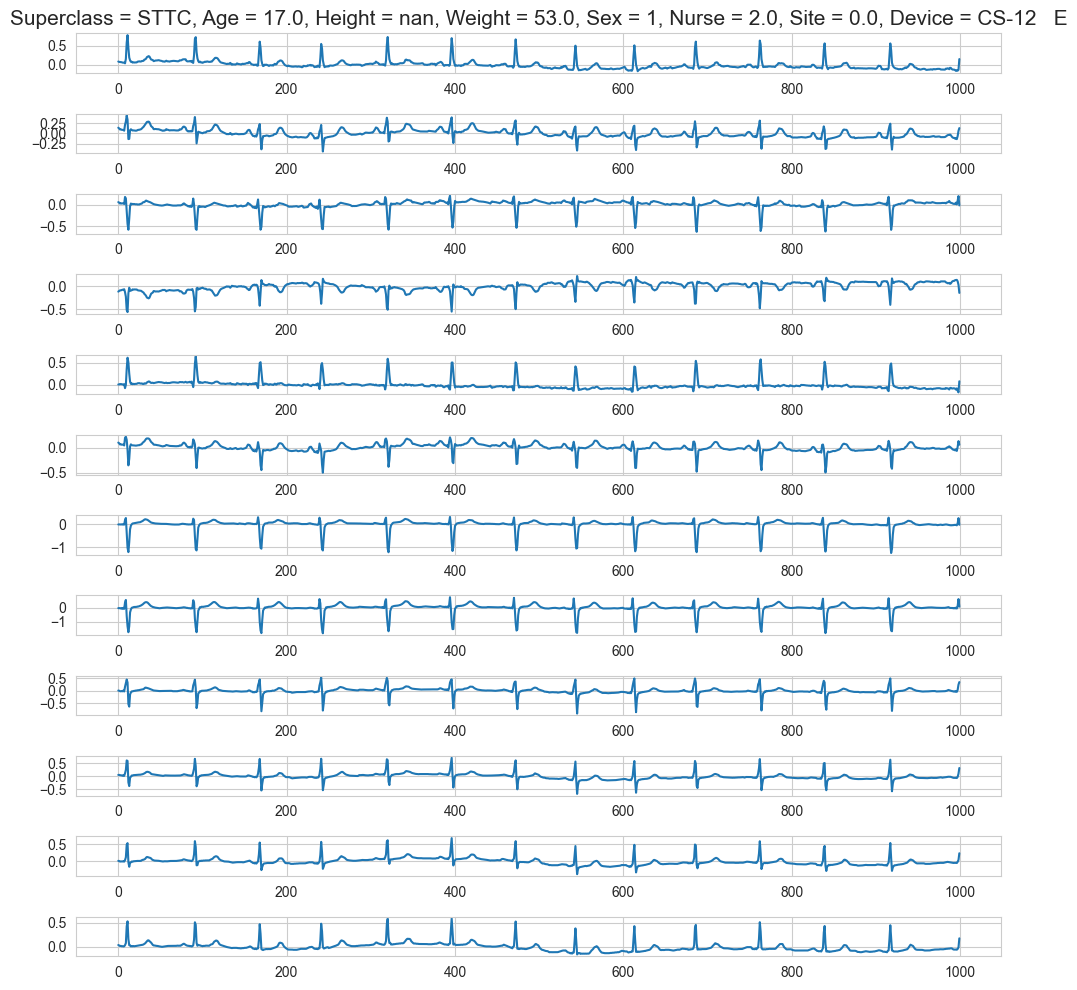

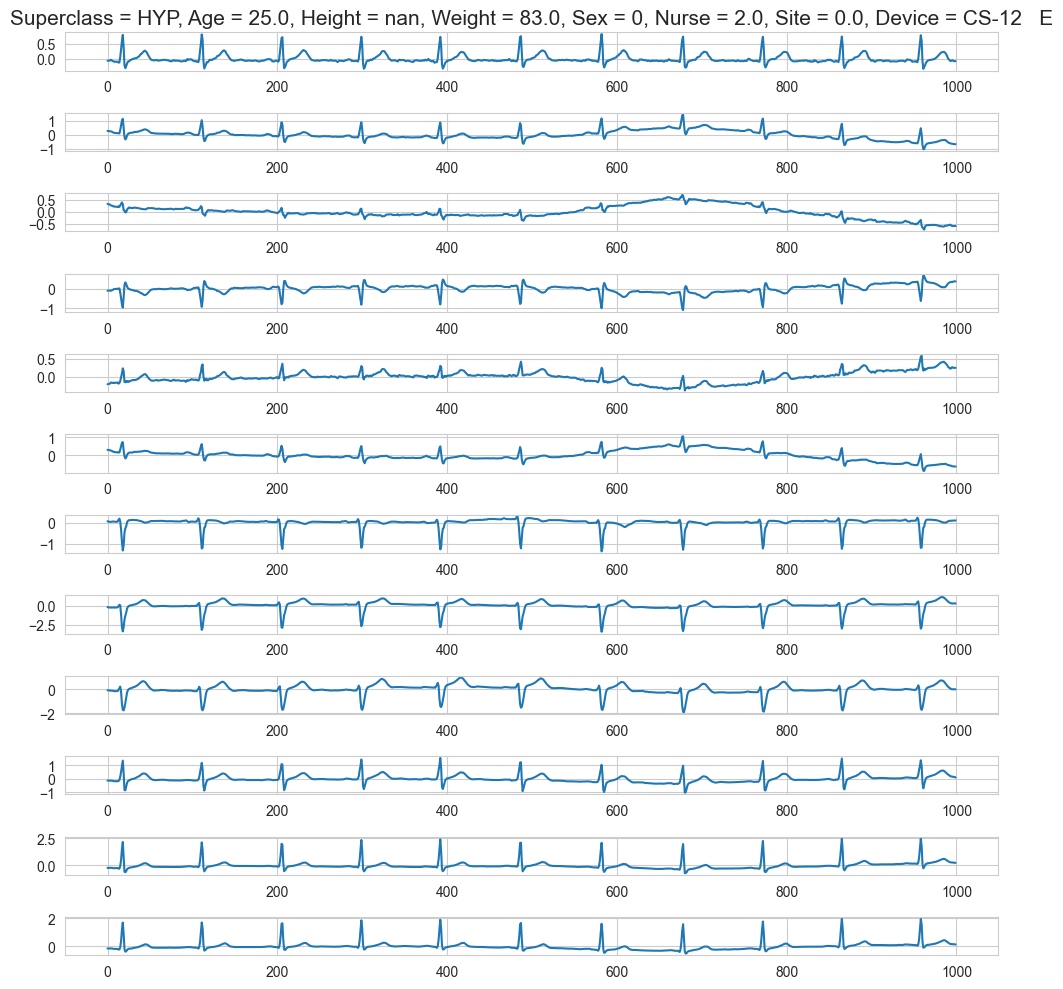

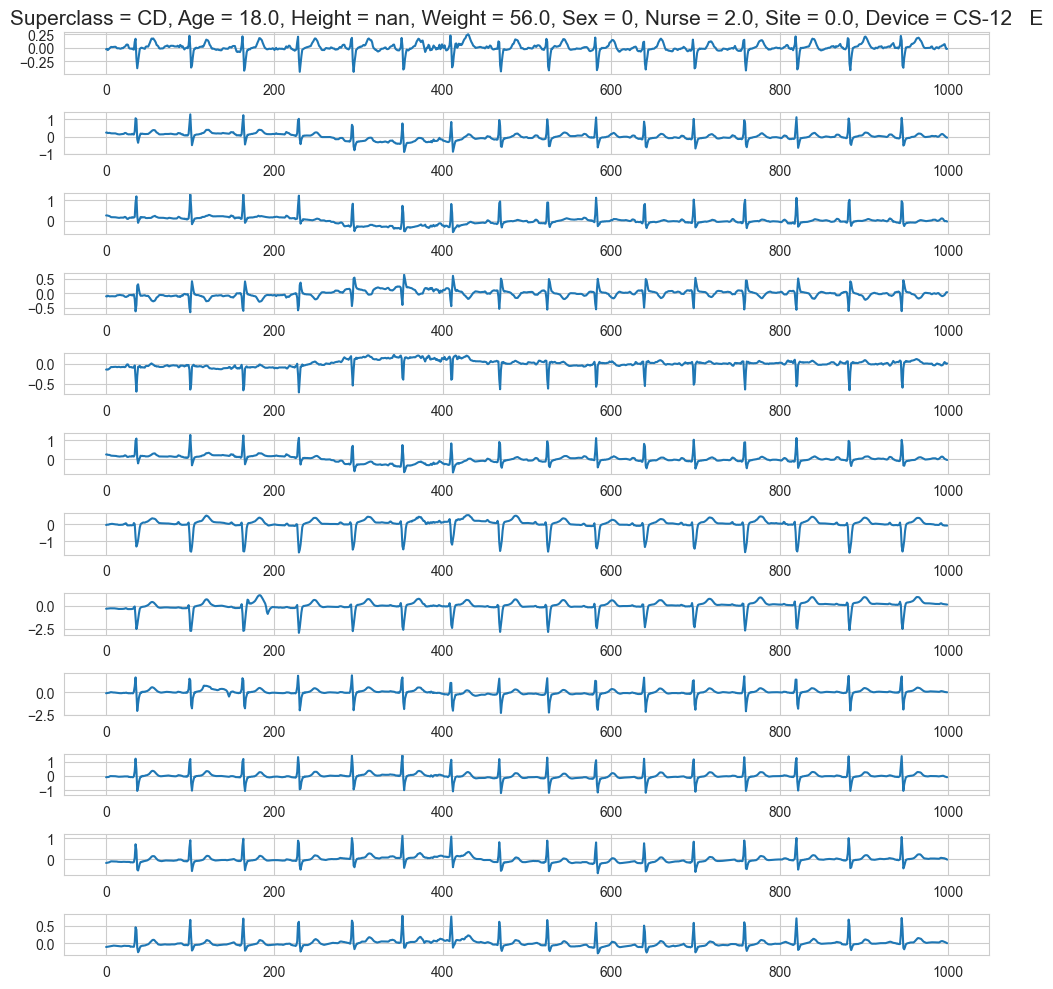

In [70]:
sample_num = 1

for superclass in superclass_cols:
    filt = y_all[superclass] == 1
    y_selected = y_all.loc[filt]
    x_selected = x_all[filt]
    
    for i in range(sample_num):
        y_ = y_selected.iloc[i]
        x_ = x_selected[i]
        
        #display(y_)
        #print(y_.shape, x_.shape); assert False
        bar, axes = plt.subplots(x_.shape[1], 1, figsize=(10,10))
        title = "Superclass = {}, Age = {}, Height = {}, Weight = {}, Sex = {}, Nurse = {}, Site = {}, Device = {}".format(superclass, 
                                                                                                                           y_['age'], y_['height'], y_['weight'],
                                                                                                                           y_['sex'], y_['nurse'], y_['site'], y_['device'],)
        axes[0].set_title(title, fontsize=15)
        
        for c in np.arange(x_.shape[1]):
            sns.lineplot(x=np.arange(x_.shape[0]), y=x_[:, c], ax=axes[c])
        
        plt.tight_layout()
        plt.show()
        #assert False

# Train-Valid-Test Set Splitting

According to the source of the [dataset](https://physionet.org/content/ptb-xl/1.0.1/), there are recommended ***stratified 10-folds***, where the ***same patients are kept within the same folds***. Moreover, ***9th fold and 10th are of higher quality, which are recommeded to be used as validation set and test set***. 


> 5. Cross-validation Folds: recommended 10-fold train-test splits (strat_fold) obtained via stratified sampling while respecting patient assignments, i.e. all records of a particular patient were assigned to the same fold. Records in fold 9 and 10 underwent at least one human evaluation and are therefore of a particularly high label quality. We therefore propose to use folds 1-8 as training set, fold 9 as validation set and fold 10 as test set.

Here, I will split compile fold 1-8 as train sets, fold 9 as validation set, and fold 10 as test set.

### Train

In [71]:
x_train, y_train = get_data_by_folds(np.arange(1, 9), X, Y, update_cols, meta_cols)
print('data shape', x_train.shape)
y_train

data shape (17441, 1000, 12)


,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_ISC_,sub_SEHYP,sub_ISCI,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_WPW,sub_PMI,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
2,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,5
4,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
5,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21832,63.0,0,NaN,NaN,1.0,2.0,AT-60 3,0,0,0,...,0,0,0,0,0,0,0,0,0,7
21833,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,0,1,...,0,0,0,0,0,0,0,0,0,7
21834,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,4


### Valid

In [72]:
x_valid, y_valid = get_data_by_folds([9], X, Y, update_cols, meta_cols)
print('data shape', x_valid.shape)
y_valid

data shape (2193, 1000, 12)


,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_ISC_,sub_SEHYP,sub_ISCI,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_WPW,sub_PMI,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
8,48.0,0,NaN,95.0,2.0,0.0,CS-12 E,0,1,0,...,0,0,0,0,0,0,0,0,0,9
10,22.0,1,NaN,56.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,9
17,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,0,0,0,...,0,0,0,0,0,0,0,0,0,9
18,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,0,0,0,...,0,0,0,0,0,0,0,0,0,9
20,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21777,54.0,0,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,9
21788,72.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,1,0,...,0,0,0,0,0,0,0,0,0,9
21817,66.0,0,NaN,NaN,1.0,2.0,AT-60 3,0,0,0,...,0,0,0,0,0,0,0,0,0,9


### Test

In [73]:
x_test, y_test = get_data_by_folds([10], X, Y, update_cols, meta_cols)
print('data shape', x_test.shape)
y_test

data shape (2203, 1000, 12)


,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_ISC_,sub_SEHYP,sub_ISCI,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_WPW,sub_PMI,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
9,55.0,0,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
38,40.0,0,NaN,72.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
40,60.0,0,NaN,85.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
57,26.0,0,NaN,93.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
59,54.0,0,NaN,67.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21809,69.0,1,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,10
21812,67.0,0,NaN,NaN,1.0,2.0,AT-60 3,0,0,0,...,0,0,0,1,0,0,0,0,0,10
21818,84.0,1,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,10


In [74]:
id_cols = ['ecg_id']
channel_cols = ['channel-{}'.format(i) for i in range(12)]

y_train.to_csv('train_meta.csv', index=True)
y_train_signal = pd.DataFrame(columns=id_cols+channel_cols, index=np.arange(y_train.shape[0]*1000), dtype=np.float32)

ecg_ids = []
signals = []
for i, ecg_id in enumerate(y_train.index.values):
    y_train_signal.loc[i*1000:(i+1)*1000-1, 'ecg_id'] = [ecg_id]*1000
    y_train_signal.loc[i*1000:(i+1)*1000-1, channel_cols] = x_train[i,:,:]

y_train_signal['ecg_id'] = y_train_signal['ecg_id'].astype(int)
y_train_signal.to_csv('train_signal.csv', index=False)

display(y_train) 
display(y_train_signal)

,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_ISC_,sub_SEHYP,sub_ISCI,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_WPW,sub_PMI,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
2,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,5
4,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
5,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21832,63.0,0,NaN,NaN,1.0,2.0,AT-60 3,0,0,0,...,0,0,0,0,0,0,0,0,0,7
21833,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,0,1,...,0,0,0,0,0,0,0,0,0,7
21834,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,4


,ecg_id,channel-0,channel-1,channel-2,channel-3,channel-4,channel-5,channel-6,channel-7,channel-8,channel-9,channel-10,channel-11
0,1,-0.119,-0.055,0.064,0.086,-0.091,0.004,-0.069,-0.031,0.000,-0.026,-0.039,-0.079
1,1,-0.116,-0.051,0.065,0.083,-0.090,0.006,-0.064,-0.036,-0.003,-0.031,-0.034,-0.074
2,1,-0.120,-0.044,0.076,0.082,-0.098,0.016,-0.058,-0.034,-0.010,-0.028,-0.029,-0.069
3,1,-0.117,-0.038,0.080,0.077,-0.098,0.021,-0.050,-0.030,-0.015,-0.023,-0.022,-0.064
4,1,-0.103,-0.031,0.072,0.066,-0.087,0.021,-0.045,-0.027,-0.020,-0.019,-0.018,-0.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17440995,21836,0.096,0.189,0.093,-0.143,0.001,0.141,-0.034,0.189,0.162,0.227,0.183,0.128
17440996,21836,0.051,0.119,0.068,-0.085,-0.009,0.093,-0.049,0.195,0.172,0.217,0.127,0.081
17440997,21836,0.033,0.070,0.037,-0.052,-0.002,0.054,-0.097,0.140,0.215,0.218,0.101,0.052
17440998,21836,0.027,0.082,0.055,-0.055,-0.014,0.068,-0.104,0.123,0.200,0.210,0.335,0.010


In [75]:
y_valid.to_csv('valid_meta.csv', index=True)
y_valid_signal = pd.DataFrame(columns=id_cols+channel_cols, index=np.arange(y_valid.shape[0]*1000), dtype=np.float32)

ecg_ids = []
signals = []
for i, ecg_id in enumerate(y_valid.index.values):
    y_valid_signal.loc[i*1000:(i+1)*1000-1, 'ecg_id'] = [ecg_id]*1000
    y_valid_signal.loc[i*1000:(i+1)*1000-1, channel_cols] = x_valid[i,:,:]

y_valid_signal['ecg_id'] = y_valid_signal['ecg_id'].astype(int)
y_valid_signal.to_csv('valid_signal.csv', index=False)

display(y_valid) 
display(y_valid_signal)

,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_ISC_,sub_SEHYP,sub_ISCI,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_WPW,sub_PMI,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
8,48.0,0,NaN,95.0,2.0,0.0,CS-12 E,0,1,0,...,0,0,0,0,0,0,0,0,0,9
10,22.0,1,NaN,56.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,9
17,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,0,0,0,...,0,0,0,0,0,0,0,0,0,9
18,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,0,0,0,...,0,0,0,0,0,0,0,0,0,9
20,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21777,54.0,0,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,9
21788,72.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,1,0,...,0,0,0,0,0,0,0,0,0,9
21817,66.0,0,NaN,NaN,1.0,2.0,AT-60 3,0,0,0,...,0,0,0,0,0,0,0,0,0,9


,ecg_id,channel-0,channel-1,channel-2,channel-3,channel-4,channel-5,channel-6,channel-7,channel-8,channel-9,channel-10,channel-11
0,8,-0.041,-0.080,-0.039,0.060,-0.001,-0.060,0.045,-0.005,0.005,-0.055,-0.070,-0.040
1,8,-0.039,-0.076,-0.037,0.058,-0.001,-0.057,0.045,-0.007,0.001,-0.055,-0.070,-0.040
2,8,-0.018,-0.069,-0.051,0.043,0.017,-0.059,0.045,-0.013,-0.006,-0.055,-0.073,-0.045
3,8,-0.013,-0.063,-0.050,0.038,0.019,-0.056,0.045,-0.016,-0.012,-0.058,-0.077,-0.049
4,8,-0.020,-0.055,-0.034,0.038,0.007,-0.044,0.045,-0.021,-0.019,-0.062,-0.079,-0.056
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192995,21837,-0.024,-0.016,0.008,0.019,-0.016,-0.003,0.069,0.135,0.073,0.024,-0.012,-0.044
2192996,21837,0.000,-0.001,-0.002,0.001,0.001,-0.001,0.071,0.148,0.082,0.034,-0.009,-0.085
2192997,21837,0.091,0.012,-0.079,-0.051,0.085,-0.034,0.069,0.199,0.120,0.063,0.016,-0.117
2192998,21837,0.175,0.022,-0.153,-0.099,0.164,-0.065,0.070,0.244,0.148,0.080,0.018,-0.108


In [76]:
y_test.to_csv('test_meta.csv', index=True)
y_test_signal = pd.DataFrame(columns=id_cols+channel_cols, index=np.arange(y_test.shape[0]*1000), dtype=np.float32)

ecg_ids = []
signals = []
for i, ecg_id in enumerate(y_test.index.values):
    y_test_signal.loc[i*1000:(i+1)*1000-1, 'ecg_id'] = [ecg_id]*1000
    y_test_signal.loc[i*1000:(i+1)*1000-1, channel_cols] = x_test[i,:,:]

y_test_signal['ecg_id'] = y_test_signal['ecg_id'].astype(int)
y_test_signal.to_csv('test_signal.csv', index=False)

display(y_test) 
display(y_test_signal)

,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_ISC_,sub_SEHYP,sub_ISCI,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_WPW,sub_PMI,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
9,55.0,0,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
38,40.0,0,NaN,72.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
40,60.0,0,NaN,85.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
57,26.0,0,NaN,93.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
59,54.0,0,NaN,67.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21809,69.0,1,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,10
21812,67.0,0,NaN,NaN,1.0,2.0,AT-60 3,0,0,0,...,0,0,0,1,0,0,0,0,0,10
21818,84.0,1,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,10


,ecg_id,channel-0,channel-1,channel-2,channel-3,channel-4,channel-5,channel-6,channel-7,channel-8,channel-9,channel-10,channel-11
0,9,-0.145,-0.097,0.049,0.121,-0.096,-0.024,-0.579,-0.818,-0.647,-0.452,-0.269,-0.032
1,9,-0.115,-0.083,0.032,0.099,-0.073,-0.025,-0.369,-0.523,-0.454,-0.339,-0.246,-0.041
2,9,-0.064,-0.060,0.005,0.062,-0.034,-0.027,-0.088,-0.147,-0.196,-0.188,-0.199,-0.040
3,9,-0.093,-0.101,-0.008,0.097,-0.042,-0.054,-0.006,-0.052,-0.136,-0.146,-0.164,-0.037
4,9,-0.081,-0.108,-0.027,0.095,-0.027,-0.067,0.028,-0.001,-0.098,-0.097,-0.148,-0.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202995,21826,-0.056,-0.012,0.044,0.034,-0.050,0.016,0.064,-0.045,-0.065,-0.038,-0.014,-0.017
2202996,21826,-0.058,-0.057,0.001,0.057,-0.029,-0.028,0.072,-0.066,-0.071,-0.063,-0.057,-0.061
2202997,21826,-0.109,-0.054,0.055,0.081,-0.081,0.000,0.101,-0.049,-0.069,-0.057,-0.082,-0.090
2202998,21826,-0.091,-0.067,0.024,0.079,-0.057,-0.022,0.170,0.037,0.014,0.003,-0.047,-0.085


### Note:
* x_train, x_valid, x_test: 12-lead ECG signals for train, valid, and test set.
* y_train, y_valid, y_test: fold number, ecg id, possible feature and possible target columns for modeling.
* Columns that **should be skipped** for modeling:
    * **strat_fold**: kept to be used cross validation within train set
    * **ecg id**: the id for the ecg signal in the raw dataset, kept as a reference
* Possibly Feature columns aside the heart beat signal: ['age', 'sex', 'height', 'weight', 'nurse', 'site', 'device']
* Possibly Target columns: All superclass and subclass columns.

# Reference
* [Paper: Wagner, P., Strodthoff, N., Bousseljot, R.-D., Kreiseler, D., Lunze, F.I., Samek, W., Schaeffter, T. (2020), PTB-XL: A Large Publicly Available ECG Dataset. Scientific Data. https://doi.org/10.1038/s41597-020-0495-6](https://www.nature.com/articles/s41597-020-0495-6)